<h1><b>Star Type Classification / NASA</b></h1>
<h2>Created by Krystian Kopaniarz & Patryk Kubiak</h2>

We are going to peform data analysis on star type classification dataset.

<b>DATA DEFINITON</b><br>
<b>Temperature</b> - Temperature of the star, expressed in degrees of Kelvin: K<br>
<b>L</b> - Relative luminosity, expressed in terms of nominal solar luminosity: (L/Lo)<br>
<b>R</b> - Relative radius, expressed in terms of nominal solar radius: (R/Ro)<br>
<b>A_M</b> - Absolute magnitude, expressed in: (Mv)<br>
<b>Color</b> - Observable color of the star<br>
<b>Spectral_Class</b> - Spectral class of the star, classified under the Morgan–Keenan (MK) system<br>
<b>Type</b> - Type of the star:<br>
<ul>
    <li>Red Dwarf - 0</li>
    <li>Brown Dwarf - 1</li>
    <li>White Dwarf - 2</li>
    <li>Main Sequence - 3</li>
    <li>Super Giant - 4</li>
    <li>Hyper Giant - 5</li>
</ul>
<br>
<b>MATH</b><br>
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)<br>
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)</br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h2>Data import and basic data information</h2>

In [2]:
df = pd.read_csv('stars-data.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


(240, 7)

In [4]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


This dataset contains 240 records, 7 columns and no null values.

<h2>Data quality and data transformation</h2>

In [5]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

Value quality in Color column is poor. We have very similar values, i.e. "Whitish" and "white" that requires a correction. Before we start data visualisation, we have to make sure that this column is normalized.

In [7]:
df['Color'].loc[df['Color'] == 'Blue-white'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'Blue White'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'Blue white'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'yellow-white'] = 'White-Yellow'
df['Color'].loc[df['Color'] == 'Yellowish White'] = 'White-Yellow'
df['Color'].loc[df['Color'] == 'white'] = 'White'
df['Color'].loc[df['Color'] == 'yellowish'] = 'Yellowish'

df['Color'].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Pale yellow orange',
       'Blue', 'Whitish', 'Orange', 'Yellowish', 'Orange-Red'],
      dtype=object)

We reduced amount of colors from 17 to 10.

For easier data representation, we will add new column into the dataset that will be equal to alphabetical representation of star Type.

In [8]:
Type_Name = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']
df['Type_Name'] = df['Type'].replace(df['Type'].unique(), Type_Name)
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Type_Name
0,3068,0.002400,0.1700,16.12,Red,M,0,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,0,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,0,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,0,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,0,Red Dwarf
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,Hyper Giants
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,Hyper Giants
237,8829,537493.000000,1423.0000,-10.73,White,A,5,Hyper Giants
238,9235,404940.000000,1112.0000,-11.23,White,A,5,Hyper Giants


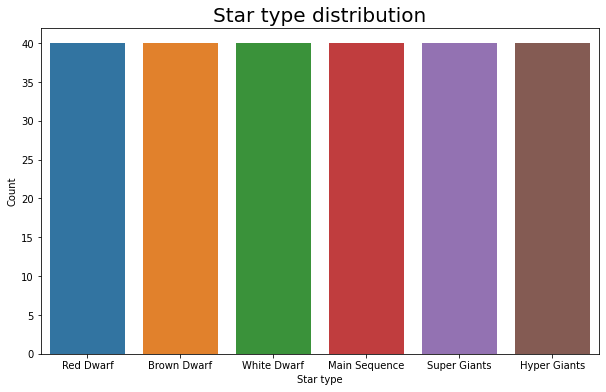

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_Name', data=df)
plt.title('Star type distribution', fontsize=20)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

This dataset contains 6 star types with equal count of 40 in each of them.

<h2>Data analysis and visualization</h2>

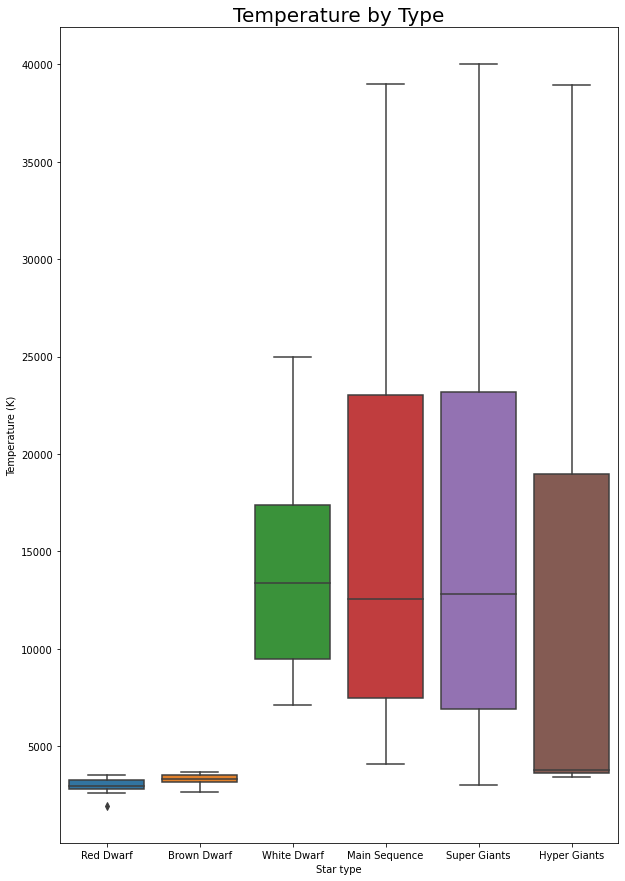

In [11]:
plt.figure(figsize=(10, 15))
sns.boxplot(x=df['Type_Name'], y=df['Temperature'])
plt.title('Temperature by Type', fontsize=20)
plt.xlabel('Star type')
plt.ylabel('Temperature (K)')
plt.show()

We can notice that the coldest of stars are White and Brown Dwarfs (Type 0 and 1). The hottest extreme temperature goes to Super Giants (Type 4). Main Sequence (Type3) and Super Giants have the hottest median across all of the dataset.

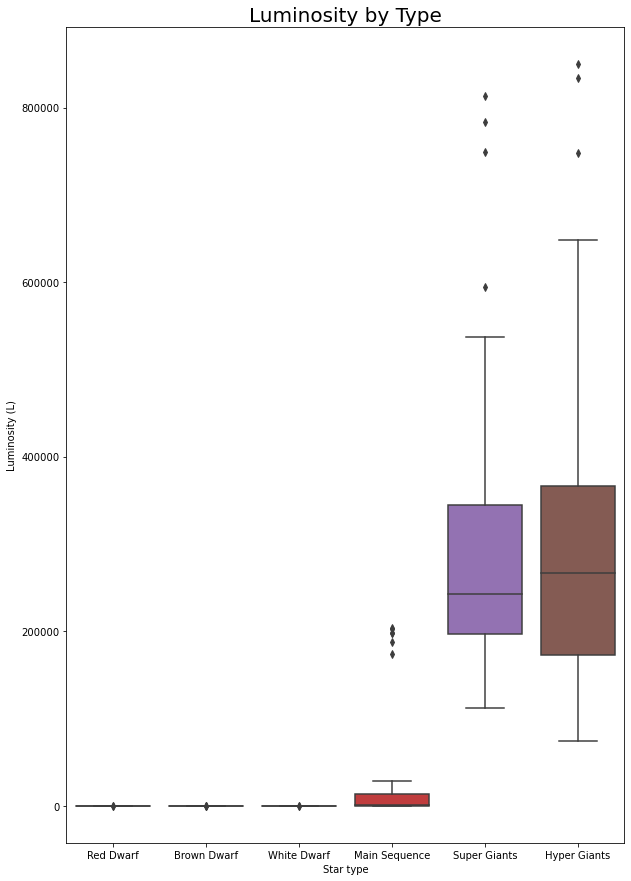

In [13]:
plt.figure(figsize=(10, 15))
sns.boxplot(x=df['Type_Name'], y=df['L'])
plt.title('Luminosity by Type', fontsize=20)
plt.xlabel('Star type')
plt.ylabel('Luminosity (L)')
plt.show()

There's dependency in dwarfs - they emit little to no light at all. The brighest stars are the largest ones - Hyper Giants.

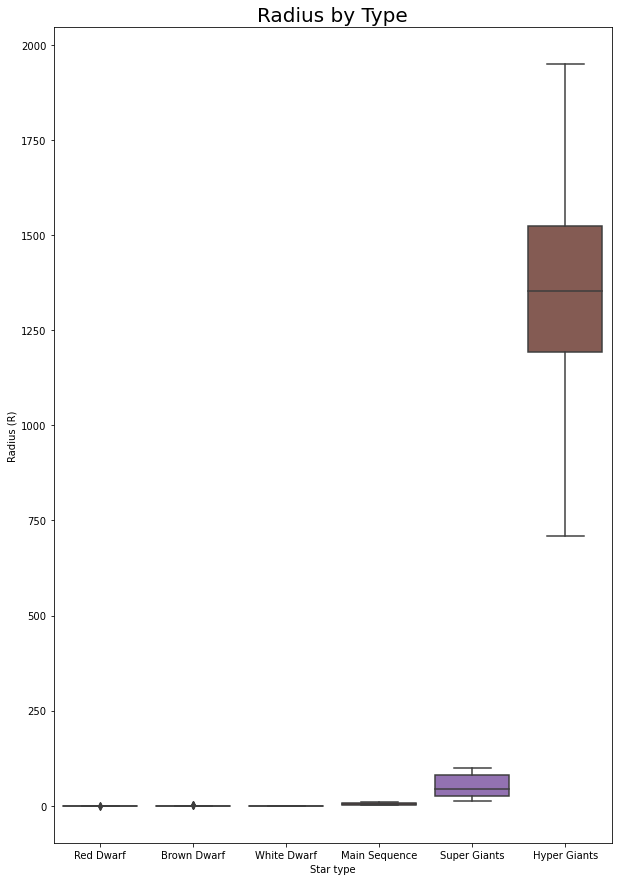

In [14]:
plt.figure(figsize=(10, 15))
sns.boxplot(x=df['Type_Name'], y=df['R'])
plt.title('Radius by Type', fontsize=20)
plt.xlabel('Star type')
plt.ylabel('Radius (R)')
plt.show()

There's huge different between Hyper Giants and the rest of the stars. The biggest Super Giants are reaching out to ~50R while Hyper Giants starts from ~700R.

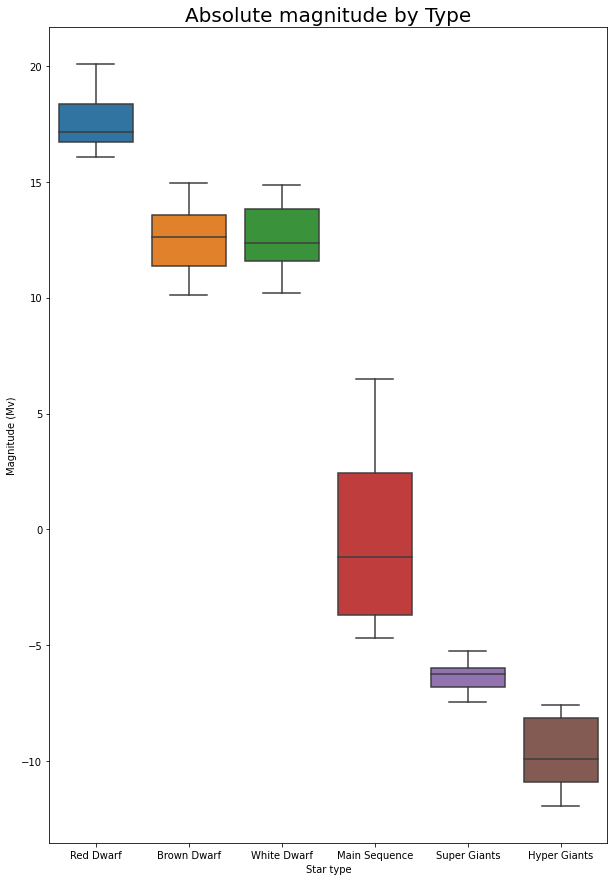

In [16]:
plt.figure(figsize=(10, 15))
sns.boxplot(x=df['Type_Name'], y=df['A_M'])
plt.title('Absolute magnitude by Type', fontsize=20)
plt.xlabel('Star type')
plt.ylabel('Magnitude (Mv)')
plt.show()

Sun's magnitude is equal to 4.83 - Magnitude is based of distance of 10 parsecs from Earth. If we would put any giants 10 parsecs away from an Earth, it would overtake the entire sky due to it's size.

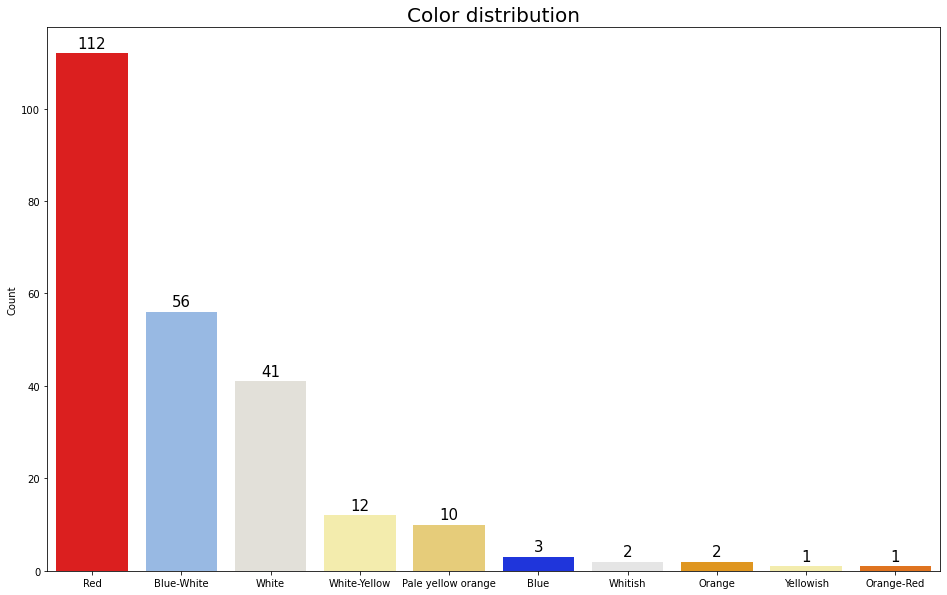

In [17]:
palette = {'Red': '#fa0000', 'Blue-White': '#8bb7f0', 'White': '#e3e1d8', 'White-Yellow': '#fff6a1',
           'Pale yellow orange': '#f8d568', 'Blue': '#001dfa', 'Whitish': '#e5e5e5', 'Orange': '#ff9d00',
           'Yellowish': '#fff6a1', 'Orange-Red': '#ff6f00'}
plt.figure(figsize=(16, 10))
splot = sns.barplot(x=df['Color'].unique(), y=df['Color'].value_counts(), palette=palette)
plt.title('Color distribution', fontsize=20)
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, 10),
                   textcoords='offset points')
plt.show()

Dominant color is red, followed by blue-white and white colors. The least occuring colors are yellowish and orange-red.

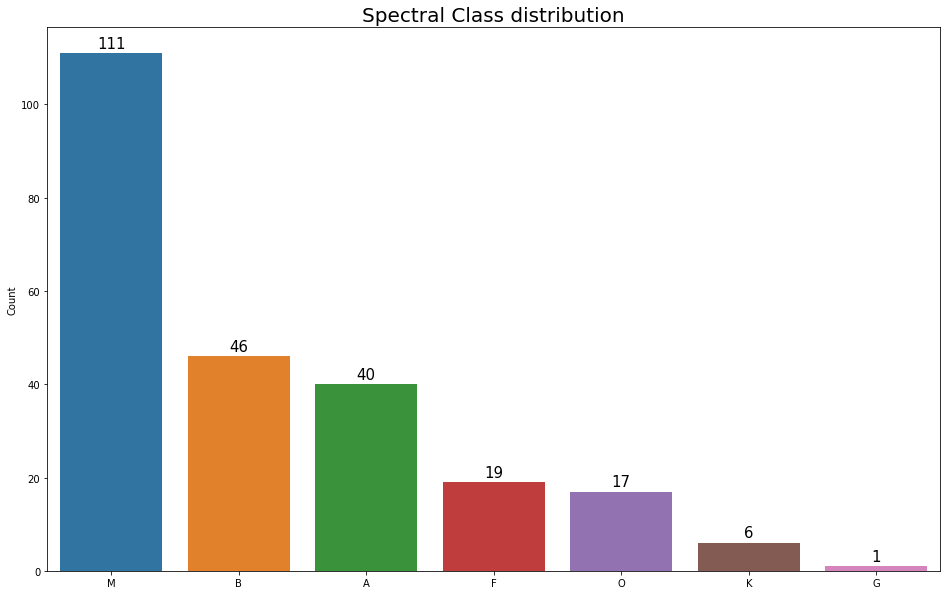

In [18]:
plt.figure(figsize=(16, 10))
splot = sns.barplot(x=df['Spectral_Class'].unique(), y=df['Spectral_Class'].value_counts())
plt.title('Spectral Class distribution', fontsize=20)
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, 10),
                   textcoords='offset points')
plt.show()

Spectral Class is a classification of stars by system of Morgan-Keenan, where O is the hottest star and M is the coolest star.<br>
Having this information the most common star is a cold star, B and A classes are second and third the hottest classes and our dataset have 86 of them in total.

<h2>Model training</h2>

In [19]:
X = df.drop(['Type', 'Color', 'Spectral_Class', 'Type_Name'], axis=1)
X

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [34]:
y = df['Type_Name']
y

0         Red Dwarf
1         Red Dwarf
2         Red Dwarf
3         Red Dwarf
4         Red Dwarf
           ...     
235    Hyper Giants
236    Hyper Giants
237    Hyper Giants
238    Hyper Giants
239    Hyper Giants
Name: Type_Name, Length: 240, dtype: object

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (120, 4) (120,) (120,)


We splitted the data 50/50 using "test_size":<br>
<ul>
    <li>Training pool = 120 (50%)</li>
    <li>Testing pool = 120 (50%)</li>
</ul>

In [41]:
print(classification_report(y_train, y_test))

               precision    recall  f1-score   support

  Brown Dwarf       0.19      0.12      0.15        24
 Hyper Giants       0.04      0.08      0.05        12
Main Sequence       0.27      0.33      0.30        18
    Red Dwarf       0.25      0.17      0.20        24
 Super Giants       0.14      0.16      0.15        19
  White Dwarf       0.12      0.09      0.10        23

     accuracy                           0.16       120
    macro avg       0.17      0.16      0.16       120
 weighted avg       0.18      0.16      0.16       120



Precision is pretty awful for given dataset. We achieved:<br>
<ul>
    <li>25% accuracy for Red Dwarfs</li>
    <li>19% accuracy for Brown Dwarfs</li>
    <li>12% accuracy for White Dwarfs</li>
    <li>27% accuracy for Main Sequence</li>
    <li>14% accuracy for Super Giants</li>
    <li>4% accuracy for Hyper Giants</li>
</ul><br>
<b>Conclusion:</b><br>
Overall accuracy is pretty awful due to small dataset and is kinda expected. However, there are few observations. The lowest accuracy of 4% is associated to Hyper Giants - their data is so broad that they could fall any other star type in different metric analysis.<br>
The highest accuracy of 4% comes to Main Sequence - "normal" stars have pretty balanced data in the dataset and it was expected that this type would lead in the chart.<br>
We're surprised that Red and Brown Dwarfs have pretty decent accuracy in this exercise - both datasets are really similar and our assumption was a bit different - we expected that they would have very low accuracy.<br>
We can see that due to low amount of data, our model is undertrained.